# Cybersecurity Threat ML Project

The aim of our cybersecurity project is to treat and analyse data from a wireshark requests recording so that we can identify threats.

First step is cleaning the data so that we can perform an efficient analyse.

We first try to evaluate the percentage of zero values in each column so that we can drop them.

In [ ]:
DROP_ZERO_TRESHOLD = 0.30

def get_percentage_columns_zero(df):
    return df[df == 0].count() / len(df) * 100

Besides we have multiple recordings that we need to merge in order to have a global view on data and a single dataset.

In [ ]:
global_df = pd.DataFrame()
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(root, file))
            global_df = pd.concat([global_df, df], ignore_index=True)

Now that we have merged the data we can print the colums with a big percentage of zeros so we can drop them.

In [ ]:
print(sorted(get_percentage_columns_zero(global_df).items(), key=lambda x: x[1], reverse=True))

Next thing is to identify the labels and to establish a correlation table between numbers and those labels.

In [ ]:
def get_all_labels(df):
    return df['Label'].unique()


print("Labels:")
print(get_all_labels(global_df))

LABELS_NUM = ['BENIGN', 'Infiltration', 'Bot', 'PortScan', 'DDoS', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection']

global_df['Label'] = global_df['Label'].apply(lambda x: LABELS_NUM.index(x))
print("Labels:")
print(get_all_labels(global_df))

Now we scale the data thanks to Min Max scaler.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Then we did the correlation matrix and we saved it as a png in order to have a better visualization.

In [ ]:
features_with_labels = features.copy()
features_with_labels['Label'] = labels

corr = features_with_labels.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.savefig('corr_matrix.png')
print("Correlation matrix saved to corr_matrix.png")

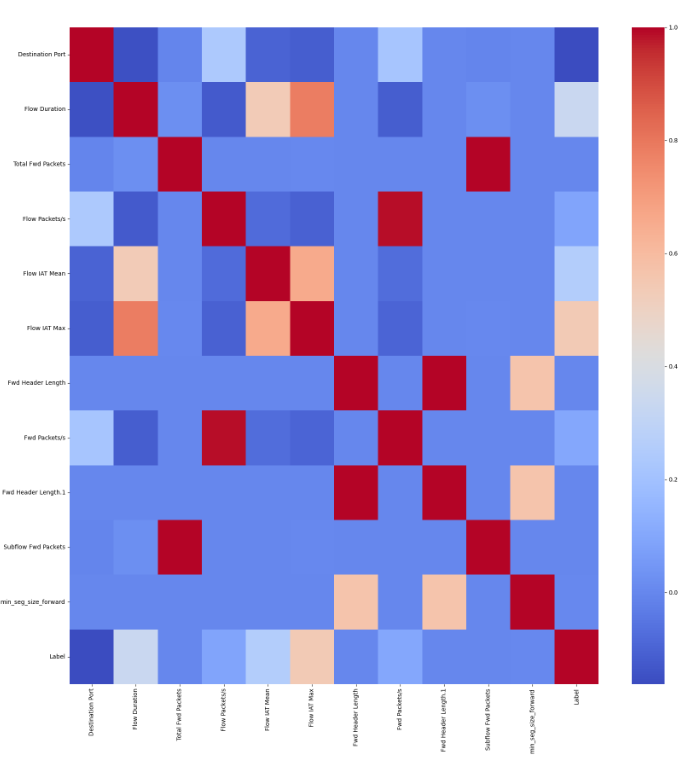

In red are the most correlated features.